<a href="https://colab.research.google.com/github/VeronikaLoiko/Textual-Analysis-of-Song-Titles/blob/main/Textual_Analysis_of_Song_Titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of the research is to analyze and gain insights from the track names of Spotify songs from the Kaggle dataset. This includes understanding the composition of track names, identifying popular themes or topics.

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading a dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
song_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv")

# Reading and analyzing the dataset

In [ ]:
song_df.shape

(114000, 21)

In [ ]:
song_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
song_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
df_columns = song_df.columns.tolist()
df_columns

['Unnamed: 0',
 'track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

##Data Preprocessing

In [ ]:
song_df.drop(columns=[song_df.columns[0]], inplace=True)
song_df.info()  #delete the first 'unnamed' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [ ]:
song_df.drop(song_df[song_df['duration_ms'] == 0].index, inplace=True) #delete a song with 'duration_ms' = 0 and the changes are applied directly to the original song_df. This means that the song_df is modified in place

In [ ]:
song_df.duplicated().sum()

450

In [ ]:
song_df.drop_duplicates(inplace = True)

In [ ]:
song_df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
song_df_gr = song_df.groupby('track_name').max().reset_index() # to provide one row as one unique song

In [ ]:
song_df_gr

,track_name,track_id,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,!I'll Be Back!,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.168,0.000000,0.1090,0.6880,142.959,4,french
1,"""A"" You're Adorable",1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.482,0.000000,0.1110,0.9220,110.720,4,rockabilly
2,"""C"" IS FOR COOKIE",1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,32,84305,False,0.553,0.8120,3,-5.542,1,0.0558,0.132,0.000010,0.0794,0.8710,118.368,4,kids
3,"""C"" is for Cookie",73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.120,0.000000,0.0408,0.7580,118.443,4,kids
4,"""Christe, Redemptor omnium""",0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.990,0.697000,0.1100,0.0395,169.401,1,sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73603,내 맘을 볼 수 있나요,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,63,225785,False,0.397,0.1660,9,-10.678,1,0.0349,0.884,0.000000,0.1000,0.1310,134.708,4,k-pop
73604,시작,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,65,202440,False,0.591,0.8180,4,-3.532,1,0.0730,0.172,0.000000,0.1260,0.5740,108.107,4,k-pop
73605,약속 (Piano Solo),4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,37,144533,False,0.504,0.1430,1,-18.713,1,0.0701,0.980,0.922000,0.1240,0.0584,148.786,4,new-age
73606,원펀맨 Theme - Sad Theme,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),37,228000,False,0.542,0.3370,2,-16.088,1,0.0539,0.985,0.933000,0.1470,0.4430,159.951,4,piano


The resulting DataFrame song_df_gr contains one row for each unique song, where each column provides information about that song.

In [189]:
song_df_gr = song_df_gr[['track_name', 'track_id', 'artists', 'album_name','track_genre', 'popularity']]

#Steps to Clean Text Data

In [190]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('words')
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [191]:
song_df_gr['track_name'] = song_df_gr['track_name'].astype('str')

In [192]:
song_df_gr['track_name'] = song_df_gr['track_name'].apply(lambda x: re.sub(r'\d+', '', x))

In [193]:
song_df_gr['track_name'] = song_df_gr['track_name'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [194]:
lemmatizer = WordNetLemmatizer()

In [195]:
song_df_gr['track_name_lemmatized'] = song_df_gr['track_name'].apply(lambda x: lemmatizer.lemmatize(x))
song_df_gr

,track_name,track_id,artists,album_name,track_genre,popularity,track_name_lemmatized
0,Ill Be Back,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,french,52,Ill Be Back
1,A Youre Adorable,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,rockabilly,39,A Youre Adorable
2,C IS FOR COOKIE,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,kids,32,C IS FOR COOKIE
3,C is for Cookie,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,kids,8,C is for Cookie
4,Christe Redemptor omnium,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,sleep,0,Christe Redemptor omnium
...,...,...,...,...,...,...,...
73603,내 맘을 볼 수 있나요,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,k-pop,63,내 맘을 볼 수 있나요
73604,시작,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,k-pop,65,시작
73605,약속 Piano Solo,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,new-age,37,약속 Piano Solo
73606,원펀맨 Theme Sad Theme,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),piano,37,원펀맨 Theme Sad Theme


In [196]:
track_names = song_df_gr['track_name_lemmatized']

Lemmatization is a process in natural language processing (NLP) that involves reducing words to their basic or root form, known as a lemma. After lemmatization, I made sure that the text data was clean, consistent, and ready for meaningful analysis, leading to more accurate and insightful results.

After applying the text cleaning process, the output shows the cleaned version of the text with unnecessary words removed and all the remaining words converted to their base or root form.

# Word Frequency Exploration and Visualization in Track Names

In [197]:
list_of_eng_words = []

for track in track_names:
  words = track.lower().split()
  for word in words:
    if (word in english_words) & (word not in english_stopwords) & (len(word) >=3):
      list_of_eng_words.append(word)

In [198]:
df_eng_words = pd.DataFrame({'word': list_of_eng_words}) # create a dataframe based on the big list of all words
top_eng_words = df_eng_words['word'].value_counts().reset_index()

top_eng_words

,word,count
0,remix,1994
1,feat,1873
2,love,1463
3,mix,1387
4,live,1255
...,...,...
10386,malfunction,1
10387,malformed,1
10388,chief,1
10389,circuit,1


<Axes: xlabel='word', ylabel='count'>

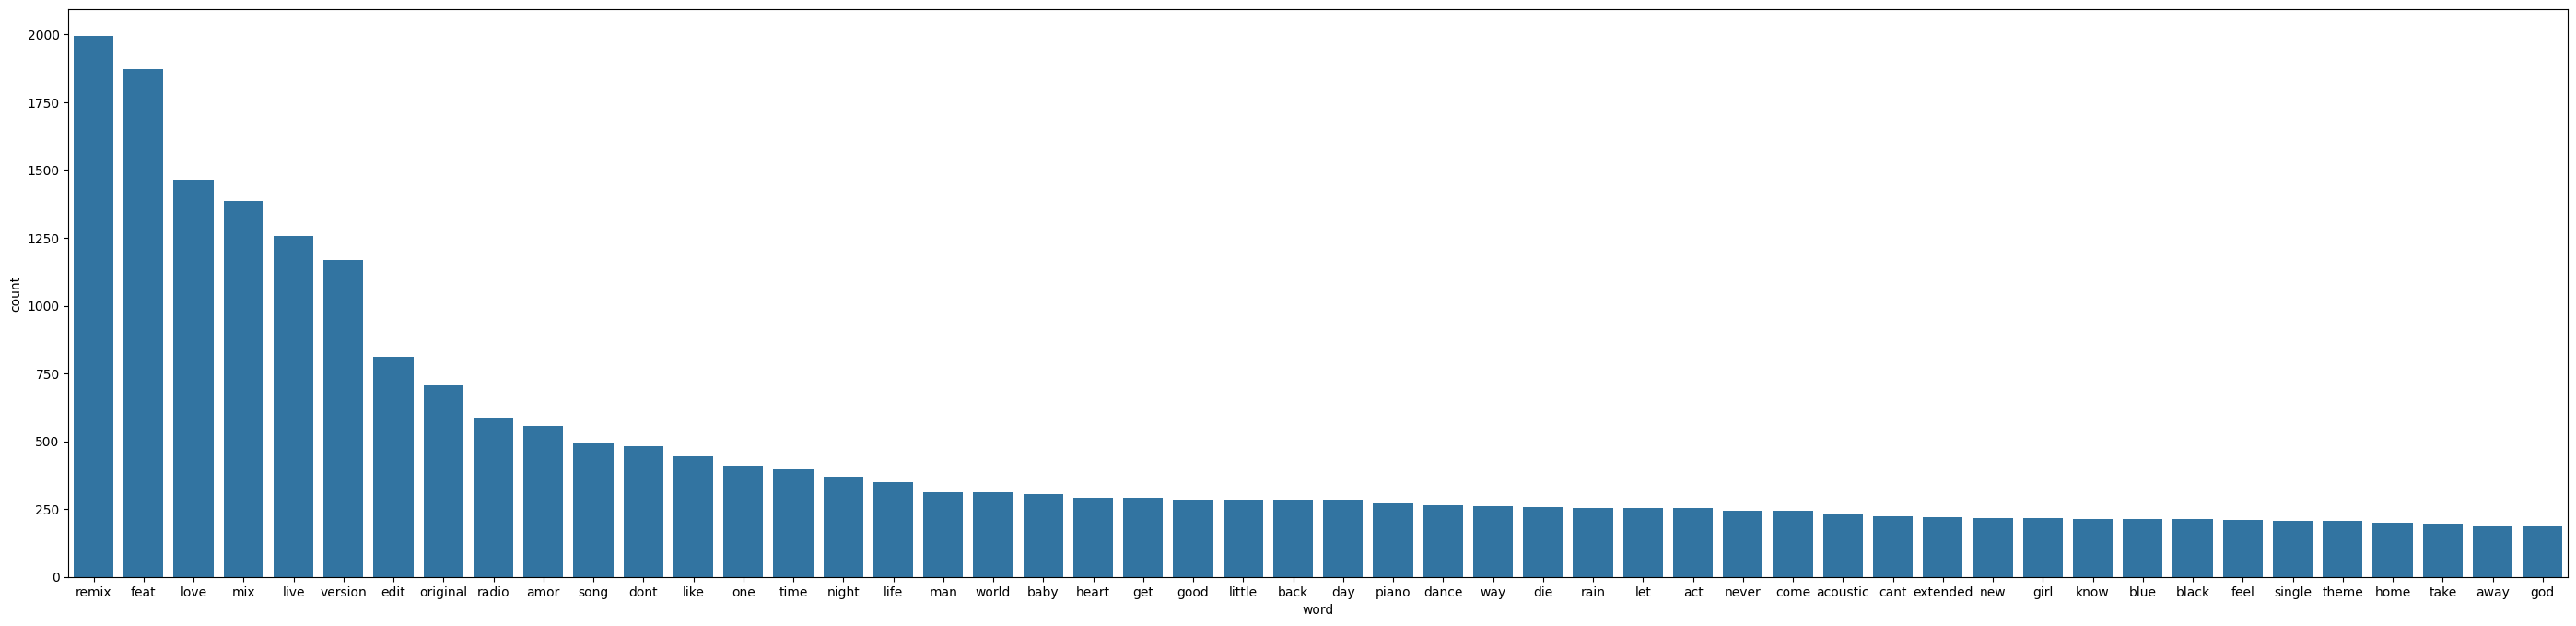

In [199]:
plt.figure(figsize=(35,8))
sns.barplot(data = top_eng_words.head(50), x ='word', y = 'count')

In [203]:
from wordcloud import WordCloud

In [204]:
word_freq = dict(zip(top_eng_words['word'], top_eng_words['count']))

wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(word_freq)

Word cloud provides visual representation of text data, making it easier to identify patterns and trends. In general, word clouds are valuable for quickly summarizing and exploring textual content.  

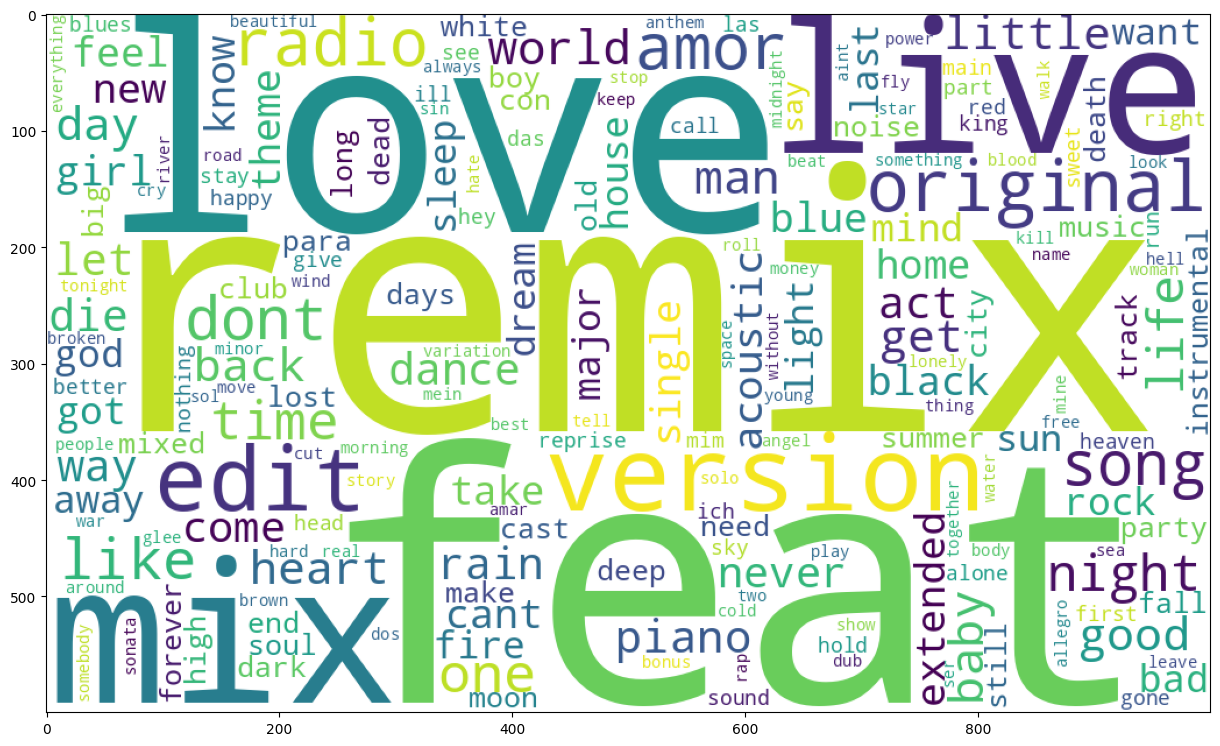

In [205]:
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.tight_layout(pad = 0)

Based on the word cloud above it can be noticed that the most frequently encountered words in track names are: remix, feat, mix, version, edit ect.


In the context of textual analysis, words like "remix", "feat", "mix", "version", and "edit" are often considered useless or stop words. This is because they are commonly used in the music industry to denote different versions of a track or collaborations and do not provide meaningful information about the content or themes of the song.

In [210]:
song_df_gr['diff_versions'] = (song_df_gr['track_name_lemmatized'].isin(['remix', 'mix', 'version', 'edit', 'original', 'radio'])).astype(int)

In order not to lose information about different versions of the track, I created a column “diff_versions”, which indicates 1 if there is another version, 0 if there is not.

#Impact of 'Love' in Track Names on Song Popularity

In [211]:
song_df_gr['contains_love'] = np.where(song_df_gr['track_name'].str.contains(r'\blove\b', case = False), 1, 0)

In [212]:
song_df_gr

,track_name,track_id,artists,album_name,track_genre,popularity,track_name_lemmatized,diff_versions,contains_love
0,Ill Be Back,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,french,52,Ill Be Back,0,0
1,A Youre Adorable,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,rockabilly,39,A Youre Adorable,0,0
2,C IS FOR COOKIE,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,kids,32,C IS FOR COOKIE,0,0
3,C is for Cookie,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,kids,8,C is for Cookie,0,0
4,Christe Redemptor omnium,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,sleep,0,Christe Redemptor omnium,0,0
...,...,...,...,...,...,...,...,...,...
73603,내 맘을 볼 수 있나요,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,k-pop,63,내 맘을 볼 수 있나요,0,0
73604,시작,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,k-pop,65,시작,0,0
73605,약속 Piano Solo,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,new-age,37,약속 Piano Solo,0,0
73606,원펀맨 Theme Sad Theme,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),piano,37,원펀맨 Theme Sad Theme,0,0


In [213]:
love_pop = song_df_gr.groupby('contains_love')['popularity'].mean()

In [214]:
love_pop

contains_love
0    35.578858
1    40.209722
Name: popularity, dtype: float64

Songs with "love" in their track names have 40.21 mean popularity compared to songs without "love" in their track names, with a mean popularity of 35.58.
This suggests that songs with "love" in their track names might tend to be more popular on average compared to those without. This might indicate that love-themed songs are more likely to resonate with listeners and gain popularity.